
# K-vecinos más cercanos (KNN)
## Datos de clientes bancarios: 

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier

clientes = pd.read_csv("pelis2.csv")
clientes

,edad,repeticiones,fantasia,terror,misterio,drama,likee
0,15,44,1.0,NaN,NaN,1.0,1.0
1,15,24,NaN,1.0,NaN,1.0,1.0
2,15,3,1.0,NaN,NaN,NaN,1.0
3,16,7,NaN,1.0,1.0,NaN,1.0
4,16,55,NaN,NaN,NaN,NaN,NaN
5,17,15,1.0,NaN,NaN,NaN,NaN
6,17,73,NaN,1.0,NaN,NaN,1.0
7,18,14,1.0,1.0,NaN,1.0,1.0
8,18,53,1.0,1.0,NaN,1.0,1.0
9,18,29,1.0,NaN,NaN,NaN,1.0


# Fantasia , Terror , Misterio , Drama

In [34]:
fantasia1 = clientes[clientes["fantasia"]==1]
terror1 = clientes[clientes["terror"]==1]
misterio1 = clientes[clientes["misterio"]==1]
drama1 = clientes[clientes["drama"]==1]

# Gráfica: peliculas


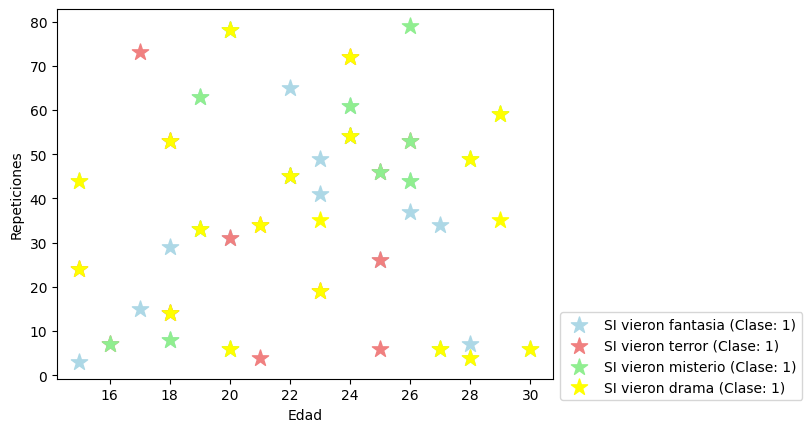

In [42]:
plt.scatter(fantasia1["edad"], fantasia1["repeticiones"],
            marker="*", s=150, color="lightblue",
            label="SI vieron fantasia (Clase: 1)")


plt.scatter(terror1["edad"], terror1["repeticiones"],
            marker="*", s=150, color="lightcoral", 
            label="SI vieron terror (Clase: 1)")


plt.scatter(misterio1["edad"], misterio1["repeticiones"],
            marker="*", s=150, color="lightgreen", 
            label="SI vieron misterio (Clase: 1)")


plt.scatter(drama1["edad"], drama1["repeticiones"],
            marker="*", s=150, color="yellow",
            label="SI vieron drama (Clase: 1)")



plt.ylabel("Repeticiones")
plt.xlabel("Edad")
plt.legend(bbox_to_anchor=(1, 0.2)) 
plt.show()

# Preparación de los datos (Escalar)

In [36]:
datos = clientes[["edad", "fantasia", "terror", "misterio", "drama"]]
clase = clientes["likee"]

escalador = preprocessing.MinMaxScaler()

datos = escalador.fit_transform(datos)

# Creación del Modelo KNN
## Valor de K

In [37]:
clasificador = KNeighborsClassifier(n_neighbors=2)

clasificador.fit(datos, clase)


from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.ensemble import HistGradientBoostingClassifier

# Crear el clasificador
clasificador_hist = HistGradientBoostingClassifier()

# Ajustar el modelo
clasificador_hist.fit(datos, clase)

ValueError: Found input variables with inconsistent numbers of samples: [15, 30]

# Nuevo Solicitante (Clasificación)

c:\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Clase: [0]
Probabilidades por clase [[0.5 0.5]]
Al nuevo solicitante no le gustaría la película.


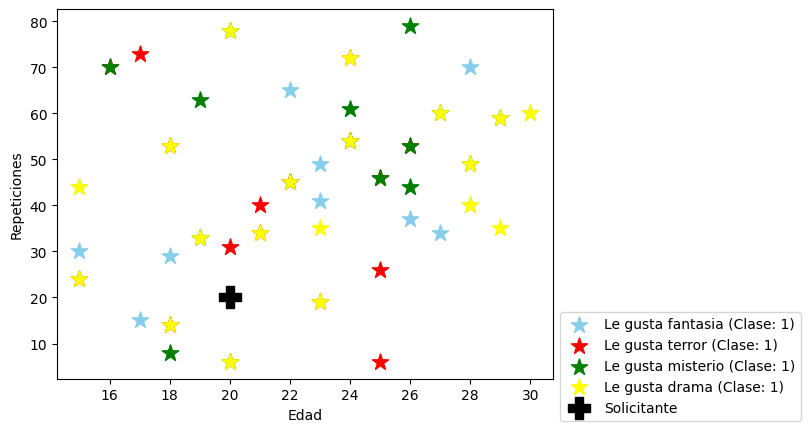

In [ ]:
edad = 20
fantasia = 0
terror = 0
misterio = 1
drama = 0

#Escalar los datos del nuevo solicitante
solicitante = escalador.transform([[edad, fantasia, terror, misterio, drama]])

#Calcular clase y probabilidades
print("Clase:", clasificador.predict(solicitante))
print("Probabilidades por clase",
      clasificador.predict_proba(solicitante))


resultado = clasificador.predict(solicitante)

if resultado == 1:
    print("Al nuevo solicitante le gustaría la película.")
else:
    print("Al nuevo solicitante no le gustaría la película.")

#Código para graficar
plt.scatter(fantasia1["edad"], fantasia1["repeticiones"],
            marker="*", s=150, color="skyblue",
            label="Le gusta fantasia (Clase: 1)")

plt.scatter(terror1["edad"], terror1["repeticiones"],
            marker="*", s=150, color="red", 
            label="Le gusta terror (Clase: 1)")

plt.scatter(misterio1["edad"], misterio1["repeticiones"],
            marker="*", s=150, color="green", 
            label="Le gusta misterio (Clase: 1)")

plt.scatter(drama1["edad"], drama1["repeticiones"],
            marker="*", s=150, color="yellow",
            label="Le gusta drama (Clase: 1)")

plt.scatter(edad,edad, marker="P", s=250, color="black", label="Solicitante") 
plt.ylabel("Repeticiones")
plt.xlabel("Edad")
plt.legend(bbox_to_anchor=(1, 0.2)) 
plt.show()